<a href="https://colab.research.google.com/github/bgarcia360/Google_colab/blob/main/Country_First_Medal_in_Olympics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<H1>Olympics First Medal by Country</H1>
<H2> By Bernardo Garcia</H2>
This Colab is graphing the frist time a country won a medal. 

<img src ='https://findthatlogo.com/wp-content/uploads/2017/02/summer-olympic-logo-cover.gif'/>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import sys
sns.set_theme
sns.set_style
sns.set()
plt.rcParams['figure.figsize'] = [40, 10]
pd.set_option('display.max_rows', None)


<h1> Data Set </h1>
We are using the bash command to get the Olympics data set from Kaggle and upload it to my Github repository. <a href="https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results">Kaggle</a> is to link to download the dataset from Kaggle if you don't want to run my bash command. 

!weg command will download the zip file from my GitHub to colab content folder under the file name of athlete_events.zip

!unzip will unzip the csv file. 

In [ ]:

# We are using the bash command  get the olimpi data set I got for kaggle
!wget -O athlete_events.zip https://github.com/bgarcia360/data_sets_for_colab/blob/main/athlete_events.zip?raw=true
!unzip athlete_events.zip



--2021-08-09 03:39:17--  https://github.com/bgarcia360/data_sets_for_colab/blob/main/athlete_events.zip?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/bgarcia360/data_sets_for_colab/raw/main/athlete_events.zip [following]
--2021-08-09 03:39:17--  https://github.com/bgarcia360/data_sets_for_colab/raw/main/athlete_events.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bgarcia360/data_sets_for_colab/main/athlete_events.zip [following]
--2021-08-09 03:39:17--  https://raw.githubusercontent.com/bgarcia360/data_sets_for_colab/main/athlete_events.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|18

In [ ]:
data = pd.read_csv('athlete_events.csv')
data.head()
url='https://raw.githubusercontent.com/bgarcia360/data_sets_for_colab/main/noc_regions.csv'
noc=pd.read_csv(url)
noc.head()



,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


<h1> Data Clean<h1>

Since this data set has summer and winter, and I am only interested in the summer data sets, I can filter the data and drop any N/A in the age column. 

In [ ]:
summer = data[data['Season']== 'Summer']
summer = summer.dropna(axis=0,subset=['Year'])
summer =pd.merge(summer,noc,on='NOC')
summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


<h2> Country first medals? </h2>

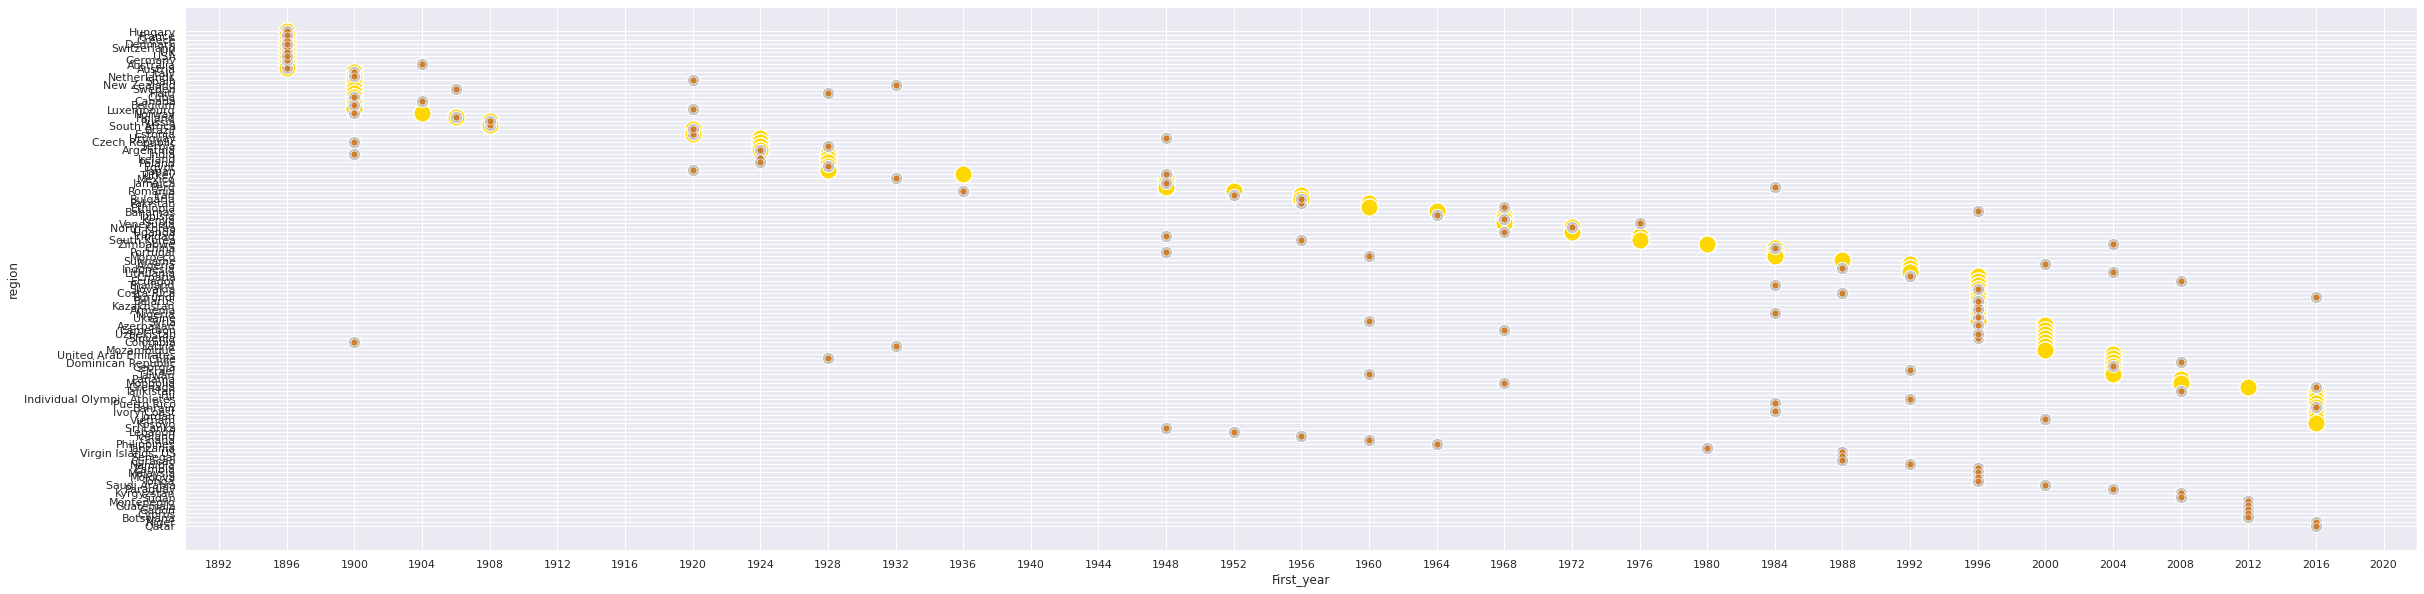

In [ ]:
Gold =summer[summer['Medal']=="Gold"]
first_gold= Gold.groupby('region')['Year'].min().reset_index(name="First_year")
first_gold=first_gold.sort_values(by='First_year')
Silver =summer[summer['Medal']=="Silver"]
first_silver= Silver.groupby('region')['Year'].min().reset_index(name="First_year")
first_silver=first_silver.sort_values(by='First_year')
Bronze =summer[summer['Medal']=="Bronze"]
first_bronze= Bronze.groupby('region')['Year'].min().reset_index(name="First_year")
first_bronze=first_bronze.sort_values(by='First_year')
#Gold.head()
first_time=sns.scatterplot(x='First_year',y='region',data=first_gold,color='gold',s=300)
first_time=sns.scatterplot(x='First_year',y='region',data=first_silver,color='silver',s=150)
first_time=sns.scatterplot(x='First_year',y='region',data=first_silver,color='#cd7f32',s=50)
#plt.ylim(200,4)
#plt.yticks(np.arange(0,100,step=10))
first_time.xaxis.set_major_locator(ticker.MultipleLocator(4))
#first_time.set_major_formatter(ticker.ScalarFormatter())

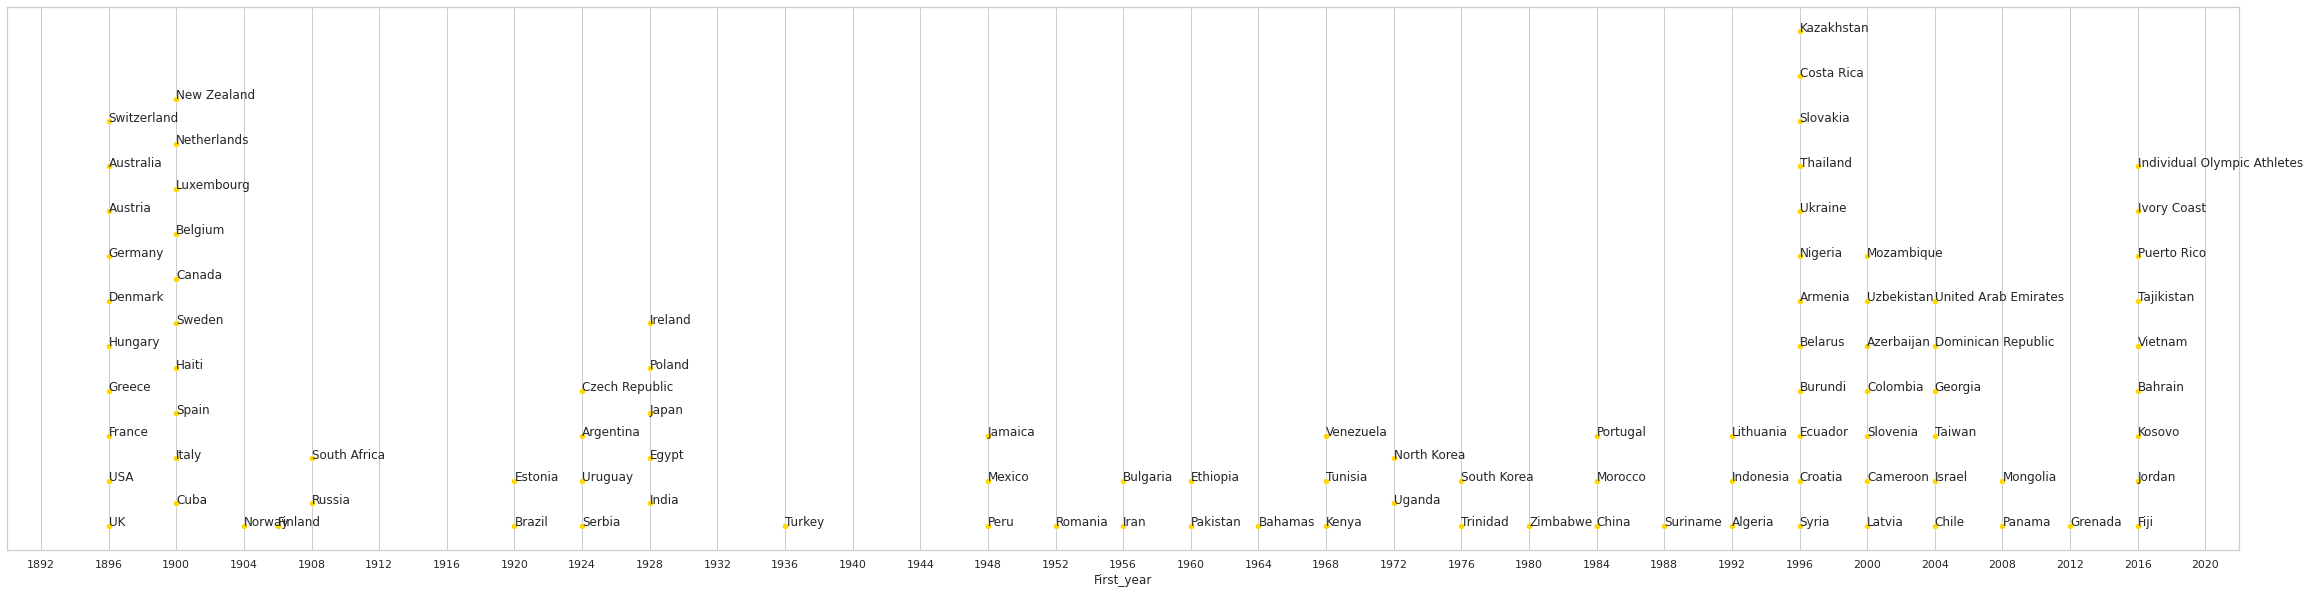

In [ ]:
#year_list = first_gold["First_year"].unique()
#Gold['count'] = Gold.groupby(['Year']).rank(method='first')
#Gold.head()
#sns.set_style("darkgrid")

first_gold["WL"]=first_gold['region'].str.len()
first_gold.head()
first_gold['rank_']=first_gold.groupby(['First_year'])['WL'].rank(method='first')
#df.loc[df['channel'].isin(['sale','fullprice'])]
first_gold.loc[first_gold['First_year'].isin([1900,1908,1928,1972]),'rank_']+=.5
#first_time_2 =sns.FacetGrid(first_gold, row="First_year",  margin_titles=True)
first_time_2 =sns.scatterplot(x="First_year",y="rank_",data=first_gold,color='Gold')
first_time_2.xaxis.set_major_locator(ticker.MultipleLocator(4))
for i in range(0,first_gold.shape[0]):
 plt.text(x=first_gold.First_year[i],y=first_gold.rank_[i],s=first_gold.region[i])
 

first_time_2.set(ylabel=None)
first_time_2.set(yticklabels=[])
sns.set_style("whitegrid")
first_time_2.yaxis.grid(False)



In [ ]:
first_silver["WL"]=first_silver['region'].str.len()
first_silver.head()
first_silver['rank_']=first_silver.groupby(['First_year'])['WL'].rank(method='first')
first_silver.head()
#first_time_2 =sns.FacetGrid(first_gold, row="First_year",  margin_titles=True)
first_time_2 =sns.scatterplot(x="First_year",y="rank_",data=first_silver,color='silver')
first_time_2.xaxis.set_major_locator(ticker.MultipleLocator(4))
for i in range(0,first_silver.shape[0]):
 plt.text(x=first_silver.First_year[i],y=first_silver.rank_[i],s=first_silver.region[i])
 

first_time_2.set(ylabel=None)
first_time_2.set(yticklabels=[])
sns.set_style("whitegrid")
first_time_2.yaxis.grid(False)

In [ ]:
first_bronze["WL"]=first_bronze['region'].str.len()
first_bronze.head()
first_bronze['rank_']=first_bronze.groupby(['First_year'])['WL'].rank(method='first')
first_bronze.head()
#first_time_2 =sns.FacetGrid(first_gold, row="First_year",  margin_titles=True)
first_time_2 =sns.scatterplot(x="First_year",y="rank_",data=first_bronze,color='#cd7f32')
first_time_2.xaxis.set_major_locator(ticker.MultipleLocator(4))
for i in range(0,first_bronze.shape[0]):
 plt.text(x=first_bronze.First_year[i],y=first_bronze.rank_[i],s=first_bronze.region[i])
 

first_time_2.set(ylabel=None)
first_time_2.set(yticklabels=[])
sns.set_style("whitegrid")
first_time_2.yaxis.grid(False)

<H1> Conclusion </H1>


Thank you for exploring that data with me, and there are a lot more data to study from this data set. I would like to see what insight you can get from it. 
Happy learning y'all!